In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup, NavigableString
import requests
import time
from selenium import webdriver
import random
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
def register():
    while True:
        browser = webdriver.FirefoxOptions()
        browser.add_argument('-headless')
        browser = webdriver.Firefox(firefox_options=browser)
        # browser = webdriver.Firefox()
        browser.get('https://login.taobao.com/member/login.jhtml')
        user = browser.find_element(By.ID, 'TPL_username_1')
        try:
            input = WebDriverWait(browser, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'forget-pwd.J_Quick2Static')))
            # for i in input:
            #     if i.is_displayed():
            #         i.click()
            input.click()
        except Exception as e:
            print(e)
        #user = browser.find_element(By.ID, 'TPL_username_1')
        password = browser.find_element(By.ID, 'TPL_password_1')
        user.send_keys('18785142935')
        time.sleep(random.random() * 2)
        password.send_keys('liqianqian123')
        time.sleep(random.random() * 1)
        browser.execute_script("Object.defineProperties(navigator,{webdriver:{get:() => false}})")
        action = ActionChains(browser)
        time.sleep(random.random() * 1)
        butt = browser.find_element(By.ID, 'nc_1_n1z')
        browser.switch_to.frame(browser.find_element(By.ID, '_oid_ifr_'))
        browser.switch_to.default_content()
        action.click_and_hold(butt).perform()
        action.reset_actions()
        action.move_by_offset(285, 0).perform()
        time.sleep(random.random() * 1)
        button = browser.find_element(By.ID, 'J_SubmitStatic')
        time.sleep(random.random() * 2)
        button.click()
        time.sleep(random.random() * 2)
        # browser.get('https://www.taobao.com/')
        cookie = browser.get_cookies()
        lists = {}
        for cookiez in cookie:
            name = cookiez['name']
            value = cookiez['value']
            lists[name] = value
        if len(lists) > 10:
            break
        else:
            browser.close()
    return lists

In [3]:
cookies=register()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: use options instead of firefox_options


In [19]:
header = { 
        'Sec-Fetch-Mode':'no-cors',
        'referer': 'https://detail.tmall.com/item.htm?spm=a230r.1.14.6.670d6fbeYKDOzW&id=598079959720&cm_id=140105335569ed55e27b&abbucket=6&sku_properties=10004:653780895;5919063:6536025',
        'user-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}
url_comment='https://rate.tmall.com/list_detail_rate.htm'
params = {'currentPage': 1,
        'itemId':'598079959720',
       'sellerId': '1114511827',
        'order':3,
       'append':0,
          
      }
response=requests.get(url=url_comment, cookies=cookies,params=params, headers=header)

In [20]:
response.text


'\r\njsonp128({"rateDetail":{"rateCount":{"total":38317,"shop":0,"picNum":21599,"used":2667},"rateDanceInfo":{"storeType":4,"currentMilles":1566898266584,"showChooseTopic":false,"intervalMilles":9903806680},"rateList":[{"auctionPicUrl":"","userInfo":"","displayRatePic":"","dsr":0,"displayRateSum":0,"appendComment":{"commentId":0,"days":4,"reply":"","commentTime":"2019-08-24 00:13:28","pics":[],"content":"相当不错，美观有颜值，用着相当满意"},"fromMemory":0,"picsSmall":[],"tmallSweetPic":"tmall-grade-t3-18.png","rateDate":"2019-08-24 00:05:48","rateContent":"其他特色：好看，品质不错，样式好看 拍照效果：清晰 显示效果：很好，满意满意 原来买的是小米的，这个刚发布就喜欢上了，咬咬牙兼职了几天班赚出来这个手机钱，很漂亮，没刘海没下巴，全屏真的很棒，原来用过华为，很皮实，四年了还是好使，也不坏。很满意。 电池续航：可以 运行速度：牛X","fromMall":true,"userIdEncryption":"","sellerId":1114511827,"displayUserLink":"","id":1055978018706,"aliMallSeller":false,"reply":"","pics":["//img.alicdn.com/bao/uploaded/i1/O1CN01N2sI2m1opXPCbXXuP_!!0-rate.jpg","//img.alicdn.com/bao/uploaded/i3/O1CN01ZIwcSS1opXPDKtsFv_!!0-rate.jpg"],"buyCount":0,"userVipLevel":

In [13]:
import re
import json
start=re.search('{',response.text).span()
response_json=json.loads(response.text[start[0]:-1])
maxPage=response_json['rateDetail']['paginator']['lastPage']

JSONDecodeError: Expecting ',' delimiter: line 1 column 1138 (char 1137)

In [12]:
rateList=response_json['rateDetail']['rateList']
for rl in rateList:
    rl_temp={}
    keys=['cmsSource','displayUserNick','sellerId']
    for k in keys:
        rl_temp[k]=rl[k]
    for r in rl['auctionSku'].split(';'):
        rl_temp[r.split(':')[0]]=r.split(':')[1]
    rl_temp['rateDate']=rl['rateDate'][0:10]
        
    print(rl_temp)
    

NameError: name 'response_json' is not defined

In [51]:
import pandas as pd
rl=[{"cmsSource":"天猫","displayUserNick": "小***吧", "sellerId": 1114511827, "网络类型": "4G全网通", "机身颜色": "魅海蓝", "套餐类型": "官方标配", "存储容量": "6+64GB", "rateDate": "2019-08-22"},{"cmsSource": "天猫", "displayUserNick": "九***零", "sellerId": 1114511827, "网络类型": "4G全网通", "机身颜色": "魅海蓝", "套餐类型": "官方标配", "存储容量": "6+64GB", "rateDate": "2019-08-22"}]
pd.DataFrame(rl)

,cmsSource,displayUserNick,rateDate,sellerId,套餐类型,存储容量,机身颜色,网络类型
0,天猫,小***吧,2019-08-22,1114511827,官方标配,6+64GB,魅海蓝,4G全网通
1,天猫,九***零,2019-08-22,1114511827,官方标配,6+64GB,魅海蓝,4G全网通


In [6]:
response.text

'\r\njsonp128({"rateDetail":{"rateCount":{"total":34266,"shop":0,"picNum":20027,"used":2389},"rateDanceInfo":{"storeType":4,"currentMilles":1566525782463,"showChooseTopic":false,"intervalMilles":8807260},"rateList":[{"auctionPicUrl":"","userInfo":"","displayRatePic":"","dsr":0,"displayRateSum":0,"appendComment":null,"fromMemory":0,"picsSmall":[],"tmallSweetPic":"","rateDate":"2019-08-23 10:02:51","rateContent":"运行速度：速度还可以，有时玩游戏会有卡顿 拍照效果：拍照效果特别好 通信音质：音质也很好，听音乐的时候感觉像低音炮","fromMall":true,"userIdEncryption":"","sellerId":1114511827,"displayUserLink":"","id":1055707605063,"aliMallSeller":false,"reply":"","pics":["//img.alicdn.com/bao/uploaded/i4/O1CN01Ulb5sr1tYCUNWsqLJ_!!0-rate.jpg","//img.alicdn.com/bao/uploaded/i1/O1CN01a9vNYe1tYCUXrNgDw_!!0-rate.jpg"],"buyCount":0,"userVipLevel":0,"auctionSku":"网络类型:4G全网通;机身颜色:魅海蓝;套餐类型:官方标配;存储容量:6+128GB","anony":false,"displayUserNumId":0,"goldUser":false,"attributesMap":null,"tradeEndTime":{"date":23,"hours":9,"seconds":54,"month":7,"timezoneOffset":-48

In [52]:
url_rate=response.url
url_rate='https://rate.tmall.com/list_detail_rate.htm?currentPage=20&itemId=598aa9959720&sellerId=1114511827'
pattern=re.compile('itemId=(.+)&')
pos=re.search(pattern,url_rate

In [63]:
a={'a':1,'b':[2,3]}
b={'c':2,'d':4}
for k,v in b.items():
    a[k]=v
a

{'a': 1, 'b': [2, 3], 'c': 2, 'd': 4}

In [59]:
list(b.keys())

['c', 'd']

In [21]:
url_rate.replace(url_rate[pos[0]:pos[1]],'currentPage='+'4')

'https://rate.tmall.com/list_detail_rate.htm?currentPage=4&itemId=598079959720&sellerId=1114511827'

In [79]:
params2 = {'currentPage': 1,
        'itemId':'591118279626',
       'sellerId': '1695308781',
          'item':{'a':1,'b':2}
      }
requests.get('https://rate.tmall.com/list_detail_rate.htm',cookies=cookies,params=params2, headers=header).text



'\r\njsonp128({"rateDetail":{"rateCount":{"total":7703,"shop":0,"picNum":3703,"used":1484},"rateDanceInfo":{"storeType":4,"currentMilles":1566547975476,"showChooseTopic":false,"intervalMilles":1004415520},"rateList":[{"auctionPicUrl":"","userInfo":"","displayRatePic":"","dsr":0,"displayRateSum":0,"appendComment":null,"fromMemory":0,"picsSmall":[],"tmallSweetPic":"","rateDate":"2019-08-23 16:12:36","rateContent":"单手握持真的棒，然后轻巧单薄，不喜欢刘海屏所以选择了16s，像素很棒，录视频都挺清晰的，双扬声器和线性马达体验极佳。","fromMall":true,"userIdEncryption":"","sellerId":1695308781,"displayUserLink":"","id":1055748993931,"aliMallSeller":false,"reply":"","pics":["//img.alicdn.com/bao/uploaded/i4/O1CN011qb0IK27IXZMzXGjq_!!0-rate.jpg","//img.alicdn.com/bao/uploaded/i4/O1CN01pXSGYx27IXZQ3ujJC_!!0-rate.jpg"],"buyCount":0,"userVipLevel":0,"auctionSku":"网络类型:4G全网通;机身颜色:凝光白;套餐类型:官方标配;存储容量:6+128GB","anony":true,"displayUserNumId":0,"goldUser":false,"attributesMap":null,"tradeEndTime":{"date":23,"hours":16,"seconds":54,"month":7,"timezoneOffset":-

In [76]:
url_i='https://detail.tmall.com/item.htm?spm=a230r.1.14.6.670d6fbeYKDOzW&id=598079959720&cm_id=140105335569ed55e27b&abbucket=6&sku_properties=10004:653780895;5919063:6536025'
re.search('([?&])id=(.*?)&', url_i).group(2)

'598079959720'

In [172]:
import pandas as pd
data=pd.DataFrame(l,columns=['net_type','color','package_type','capacity'])

In [21]:
response=requests.get('https://detail.tmall.com/item.htm?spm=a230r.1.14.6.670d6fbeYKDOzW&id=598079959720&cm_id=140105335569ed55e27b&abbucket=6&sku_properties=10004:653780895;5919063:6536025')
soup=BeautifulSoup(response.text,'html.parser')


#input id="dsr-userid" type="hidden" value="1114511827"/>


<input id="dsr-userid" type="hidden" value="1114511827"/>

In [81]:
header = { 
        'referer': 'https://taobao.com/',
        'user-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}
requests.get('https://s.tmall.com/q=手机',headers=header).text

'\r\n\r\n\n      \n\n      \n\n      \n    <!DOCTYPE HTML>\n<html>\n<head>\n  \n  \n  \n  \n  \n  <meta charset="utf-8"/>\n<meta name="renderer" content="webkit"/>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge"/>\n<link rel="dns-prefetch" href="//g.alicdn.com"/>\n<link rel="dns-prefetch" href="//img.alicdn.com"/>\n<link rel="dns-prefetch" href="//gm.mmstat.com"/>\n<link rel="dns-prefetch" href="//ald.taobao.com"/>\n<link rel="dns-prefetch" href="//bar.tmall.com"/>\n<link href="//img.alicdn.com/tfs/TB1XlF3RpXXXXc6XXXXXXXXXXXX-16-16.png" rel="shortcut icon" type="image/x-icon"/>\n<link title="天猫Tmall.com" href="//g.alicdn.com/mui/global/1.2.35/file/search.xml" type="application/opensearchdescription+xml" rel="search"/>\n<meta name="spm-id" content="a2233.7711963"/>\n\n<title>您查看的页面找不到了!-理想生活上天猫</title>\n<script>\n    window.g_config = {\n        devId: \'pc\',\n        headerVersion: \'1.4.0\',\n        loadModulesLater: true,\n        \n        \n        sl: \'node\'\n    };\n</s

In [13]:
t = str(time.time()).split('.')
# 构造url的过程，get请求的参数
pagram = { 'currentPage': 1,
    '_ksTS': '%s_%s' % (t[0], t[1]),
    'callback': 'jsonp%s' %(int(t[1])+1)
}
# 随机休眠，行为分析，防止访问过快，避免被网站检测到有问题
#url='https://detail.tmall.com/item.htm?spm=a230r.1.14.6.670d6fbeYKDOzW&id=598079959720&cm_id=140105335569ed55e27b&abbucket=6&sku_properties=10004:653780895;5919063:6536025'
url='https://rate.tmall.com/list_detail_rate.htm?itemId=598079959720&spuId=1260500122&sellerId=1114511827&order=3&append=0&content=1&tagId=&posi=&picture=&groupId=&ua=098%23E1hvdQv7vcvvUvCkvvvvvjiPRFdWljibnLLv0j3mPmPy0jYjRs5ZljDvRsdWlj1E9phv2HiJWI9ZzHi47I8EzT6CvvyvhvGb9OhvenItvpvhvvvvvUhCvv147G4Uxn147DiMyY%2FrvpvEvvowmMq%2FvUAQ3QhvCvvhvvm5vpvhvvmv99GCvvpvvPMMKphv8vvvvvCvpvvvvvvCLyCvmWhvvUUdphvWvvvv9krvpv3Fvvmm86CvmVREvpvVmvvC9jaCuphvmvvv92f1P1qCmphvLv93mQvjRixr1noKHkx%2F1nBlYCh1nZVU%2BExreEIaUExr1noKD7U7SOkQiXTAVAdZaNsZVt1QorFZsWp7RAYVyO2vqbVQWl4v1WFIRfUCvpvVvvpvvhCvRphvCvvvvvmrvpvEvvBSkdV1vUBT9phv2HifwOkZzHi475gbzsyCvvpvvvvvRphvCvvvvvmCvpvW7D1gkCLw7Di49E2N9phv2HiJQO9ZzHi47ICNzT6Cvvyv2H6bL6GvuEkCvpvZ7Dly9ESw7Di4FGM5MvxfTHulz1h%3D&needFold=0'
time.sleep(random.random())
response = requests.get(url, params=pagram)
# 数据持久化——入库、文件
# csv文件:通过','区

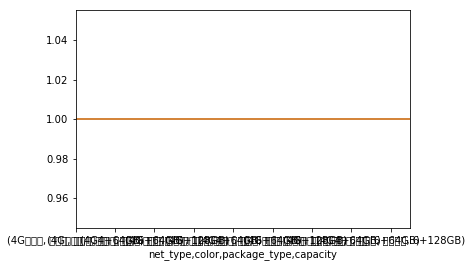

In [186]:
data['capacity'].groupby(by=[data['net_type'],data['color'],data['package_type'],data['capacity']],axis=0).count().plot()
import matplotlib.pyplot as plt
plt.show()

In [157]:
re.search('bb','aasdfbbddd').span()

(5, 7)

In [34]:
import pandas as pd
import numpy as np
import json

In [150]:
#读文件操作
f = open('淘宝店铺数据.txt','rt')
num=0
line=f.readline()
while line:   #文件内容读取 [如果read(n)有值，则读取n个字符，为空则读取全部]
    if num==0:
        sread=json.loads(line.replace('\'','\"').replace('None','\"\"'))
        cols = sread.keys()
        data=pd.DataFrame(columns=cols)
        data_temp=pd.DataFrame(columns=cols)
        data_temp.loc[0,:]=None
        num=1
    
    sread=json.loads(line.replace('\'','\"').replace('None','\"None\"'))
    for c in cols:
        data_temp.loc[0,c]= sread[c]
    data=data.append(data_temp)
    line=f.readline()  
else:
    f.close()
    data.reset_index(drop=True,inplace=True)

In [151]:
def split_price(x): #价格划分成最低价格和最高价格
    sp=x.split('-')
    if len(sp)==1:
        sp.append(sp[0])
    return sp

#销售数量 转化为数字形式 + 默认为0
def sell_deal(x):
    x=x.replace('+','')
    pos = x.find('万')
    if pos!=-1:
        x=float(x[:pos])*10000
    return x
      
data_price=pd.DataFrame(np.asarray(list(data.phone_price.apply(split_price))),columns=['low_price','high_price'])
data=pd.concat([data,data_price],axis=1)
data['sell_num']=data.sell_num.apply(sell_deal)
data['rate_num']=data.rate_num.apply(lambda x: x.replace('None',''))  

In [153]:
data.loc[4,'url']

'https://detail.tmall.com/item.htm?id=598079959720&cm_id=140105335569ed55e27b&abbucket=7&sku_properties=10004:653780895;5919063:6536025'

In [152]:
data

,phone_name,phone_price,sell_num,rate_num,collect_num,shop_name,shop_type,shop_describe,shop_service,shop_flow,describe_rate,service_rate,flow_rate,describe_label,service_label,flow_label,shop_year,url,low_price,high_price
0,新品现货当天发】华为HONOR荣耀9X系列麒麟810芯片全网通智能手机全新官方旗舰店官网正品...,1399.00-1899.00,6000,2170,14470,广东电信亿品汇专卖店,None,4.8,4.7,4.8,-0.52%,-0.52%,-0.52%,低于,低于,低于,6,https://detail.tmall.com/item.htm?id=598278970...,1399.00,1899.00
1,【最高直降200】Huawei/华为畅享9Plus全面屏超清大屏四摄学生智能手机畅享9p,1199.00-1699.00,55000,123843,712033,华为官方旗舰店,品牌直销,4.8,4.8,4.9,12.97%,12.97%,12.97%,高于,高于,高于,4,https://detail.tmall.com/item.htm?id=579484379...,1199.00,1699.00
2,【6期免息】华为科技潮牌/荣耀20全面屏超广角AI四摄麒麟980芯片智能拍照手机正品官方PR...,2699.00-2999.00,20000,46142,284735,荣耀官方旗舰店,品牌直销,4.8,4.8,4.8,0,0,0,持平,持平,持平,7,https://detail.tmall.com/item.htm?id=594370342...,2699.00,2999.00
3,【128G降300】红米k20pro高通骁龙855AI三摄4800万大全面屏学生智能游戏手机...,2299.00-2999.00,30000,31280,206152,小米官方旗舰店,品牌直销,4.8,4.8,4.8,0,0,0,持平,持平,持平,7,https://detail.tmall.com/item.htm?id=595463435...,2299.00,2999.00
4,【8月20日10:08魅焰红新色上市】华为科技潮牌/荣耀9X麒麟810芯片4800万超清双摄...,1399.00-1899.00,150000,,,荣耀官方旗舰店,品牌直销,4.8,4.8,4.8,0,0,0,持平,持平,持平,7,https://detail.tmall.com/item.htm?id=598079959...,1399.00,1899.00
5,【6期免息】Huawei/华为P30Pro曲面屏超感光徕卡四摄变焦双景录像980智能手机p3...,4988.00-6288.00,35000,62535,438884,华为官方旗舰店,品牌直销,4.8,4.8,4.9,12.97%,12.97%,12.97%,高于,高于,高于,4,https://detail.tmall.com/item.htm?id=589815124...,4988.00,6288.00
6,【12期免息丨限时直降100】Meitu/美图T9美图T9手机新款双卡双待美颜拍照手机美图手机正品,1399.00-1799.00,4375,16372,215389,美图旗舰店,品牌直销,4.7,4.6,4.7,-2.97%,-2.97%,-2.97%,低于,低于,低于,6,https://detail.tmall.com/item.htm?id=569966140...,1399.00,1799.00
7,【下单立减500元】Apple/苹果iPhone864G移动联通电信全网通4G手机官方正品苹...,3788.00,20000,178598,812058,苏宁易购官方旗舰店,品牌直销,4.8,4.8,4.8,0,0,0,持平,持平,持平,5,https://detail.tmall.com/item.htm?id=558550356...,3788.00,3788.00
8,【星耀礼盒新品上市】Huawei/华为nova5Pro超级夜景4800万AI四摄超级快充屏内...,2999.00-3799.00,50000,32484,284085,华为官方旗舰店,品牌直销,4.8,4.8,4.9,12.97%,12.97%,12.97%,高于,高于,高于,4,https://detail.tmall.com/item.htm?id=596201072...,2999.00,3799.00
9,【立减100】OPPOK3oppok3新品手机限量版oppo未来x0ppok3新款上市k5k...,1499.00-1899.00,3459,6829,35782,OPPO欧曙专卖店,None,4.9,4.8,4.9,48.72%,48.72%,48.72%,高于,高于,高于,7,https://detail.tmall.com/item.htm?id=593698892...,1499.00,1899.00


In [65]:
pri

SyntaxError: invalid syntax (<ipython-input-65-01d81e11a07c>, line 1)

In [54]:
s.replace('\'','\"')

'{"phone_name": "【星耀礼盒新品上市】Huawei/华为nova5Pro超级夜景4800万AI四摄超级快充屏内指纹超广角智能手机nova5pro", "phone_price": "2999.00-3799.00", "sell_num": "5.0万+", "rate_num": "32484", "collect_num": "284085", "shop_name": "华为官方旗舰店", "shop_type": "品牌直销", "shop_describe": "4.8", "shop_service": "4.8", "shop_flow": "4.9", "describe_rate": "12.97%", "service_rate": "12.97%", "flow_rate": "12.97%", "describe_label": "高于", "service_label": "高于", "flow_label": "高于", "shop_year": "4", "url": "https://detail.tmall.com/item.htm?id=596201072920&ns=1&abbucket=7&sku_properties=10004:827902415;5919063:6536025"}\n'

In [154]:
a=[1]
a.append(2)
a

[1, 2]